In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl
import torch
import torch.nn.functional as F
from torch.autograd import Variable

In [17]:
random_imgs = np.load('./random/random_imgs.npy')
random_labs = np.load('./random/random_labs.npy')
random_imgs = random_imgs.astype(np.float32)
random_labs = random_labs.astype(np.float32)
random_imgs = random_imgs.reshape(-1,16)
random_labs = random_labs.reshape(-1,1)
print(random_imgs.shape)
print(random_labs.shape)
x_torch = Variable(torch.from_numpy(random_imgs))
y_torch = Variable(torch.from_numpy(random_labs))
print(x_torch.shape[0])

(64, 16)
(64, 1)
64


In [18]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.l1 = torch.nn.Linear(4*4,4)
        self.l2 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self,x):
        fc_1 = self.l1(x)
        fc_1_ac = F.relu(fc_1)
        fc_2 = self.l2(fc_1_ac)
        y_pred = self.sigmoid(fc_2)
        return y_pred
    

model = Model()

for m in model.modules():
    if isinstance(m,torch.nn.Linear):
        torch.nn.init.normal(m.weight,mean=0,std=0.1)
        torch.nn.init.constant(m.bias,0.1)
        
criterion = torch.nn.BCELoss(size_average = True)
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)    

loss_array = []
accuracy_array = []
for epoch in range(2000):
    outputs = model(x_torch)

    loss = criterion(outputs,y_torch)

    y_pred = outputs.clone()
    y_pred[y_pred>=0.5] = 1
    y_pred[y_pred<0.5] = 0
    acc = torch.sum(torch.isclose(y_pred,y_torch)).item()/y_torch.shape[0]
    if epoch % 100 == 0:
        print(epoch,loss.item())
        print(epoch,acc)
    
    loss_array.append(loss)
    accuracy_array.append(acc)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/Users/cacikkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
/Users/cacikkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
/Users/cacikkong/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


0 0.7322569489479065
0 0.171875
100 0.4511900246143341
100 0.828125
200 0.41595011949539185
200 0.828125
300 0.37138909101486206
300 0.828125
400 0.3173152804374695
400 0.828125
500 0.2638336420059204
500 0.828125
600 0.21536172926425934
600 0.828125
700 0.17526797950267792
700 0.96875
800 0.14226318895816803
800 0.984375
900 0.11683223396539688
900 1.0
1000 0.09614212810993195
1000 1.0
1100 0.07961729168891907
1100 1.0
1200 0.06503433734178543
1200 1.0
1300 0.05408007651567459
1300 1.0
1400 0.04645887017250061
1400 1.0
1500 0.0403640978038311
1500 1.0
1600 0.03525825962424278
1600 1.0
1700 0.0314752459526062
1700 1.0
1800 0.02843363769352436
1800 1.0
1900 0.025400634855031967
1900 1.0


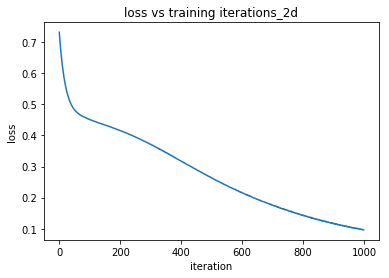

In [19]:
x = np.arange(0,1000,1)
y = loss_array[:1000]
fig = plt.figure()
plt.plot(x,y)
plt.title('loss vs training iterations_2d')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.savefig('2d_loss')

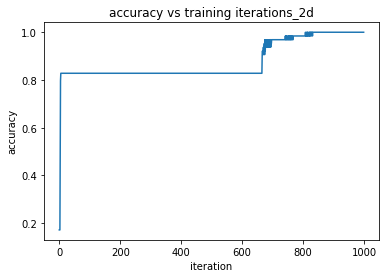

In [20]:
x = np.arange(0,1000,1)
y = accuracy_array[:1000]
fig = plt.figure()
plt.plot(x,y)
plt.title('accuracy vs training iterations_2d')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.savefig('2d_accuracy')